**Regression Project using PyCaret Python Library**<br>
By: Jose German

# Install requirements

In [1]:
# install pycaret; full installation including dependancies
#pip install pycaret[full]

# install pycaret plus all dependencies
# visual studio code recommends to use %pip instead fo !pip
#%pip install pycaret # <--------------------------------------

In [2]:
# Install analysis components of PyCaret which allow interpret_model function further in code

#%pip install pycaret[analysis] # <--------------------------------------

In [3]:
# Install MLFlow
# This library manages the ML project; It also used to track parameters, metrics, hyperparameters, feature parameters, code versions, etc
#%pip install mlflow # <--------------------------------------

In [4]:
# Gradio library used by PyCaret to create a simple web application

#%pip install gradio
#%pip install gradio==3.50 # <--------------------------------------

In [5]:
# Pydantic library used by PyCaret to build a simple API

#%pip install pydantic==1.10.12 # <--------------------------------------

# Downgrade pydantic 2.6.0; Too many annotation type errors


In [6]:
# May be required to build the dashboard

##%pip install explainerdashboard # <--------------------------------------

# Imports

In [7]:
# check installed version; should be 3.0 or newer
import pycaret
pycaret.__version__

'3.2.0'

In [8]:
import pandas as pd

# Loading dataset

In [9]:
# Here we load our CSV dataset into a pandas dataframe

#housedata = pd.read_csv('/content/new_train.csv')
housedata = pd.read_csv('C:\\Users\\joseg\\Documents\\GitHub\\PyCaret-Regression-Python\\data\\houseprices_modified.csv') #csv path
housedata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LandContour,LotConfig,LandSlope,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,YrSold,SalePrice
0,2-STORY 1946+,RL,65.0,8450,NaN,Lvl,Inside,0,1Fam,2Story,...,0,0,0,0,0,0,NaN,Feb,2008,208500
1,1-STORY 1946+,RL,80.0,9600,NaN,Lvl,FR2,0,1Fam,1Story,...,0,0,0,0,0,0,NaN,May,2007,181500
2,2-STORY 1946+,RL,68.0,11250,NaN,Lvl,Inside,0,1Fam,2Story,...,0,0,0,0,0,0,NaN,Sept,2008,223500
3,2-STORY 1945-,RL,60.0,9550,NaN,Lvl,Corner,0,1Fam,2Story,...,272,0,0,0,0,0,NaN,Feb,2006,140000
4,2-STORY 1946+,RL,84.0,14260,NaN,Lvl,FR2,0,1Fam,2Story,...,0,0,0,0,0,0,NaN,Dec,2008,250000


# Initial setup

In [10]:
# Inial setup of regression ML project. First command uses MLFlow to log experiment

from pycaret.regression import *
reg1 = setup(housedata, target='SalePrice', session_id=123, log_experiment=True, experiment_name='houseprice1')

# Below code line is similar to above except here we don't need MLFLow to log the experiment
#reg1 = setup(housedata, target='SalePrice', session_id=123)

,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1456, 56)"
4,Transformed data shape,"(1456, 134)"
5,Transformed train set shape,"(1019, 134)"
6,Transformed test set shape,"(437, 134)"
7,Ordinal features,1
8,Numeric features,40
9,Categorical features,15


2024/02/05 18:42:41 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



# Compare model baselines
Compare models function trains and evaluates the performance of al the estimators available in the model library using cross validation. The output is a scoring grid with average cross validated scored.

In [11]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16154.0644,591706750.6886,24128.4611,0.9034,0.1293,0.0945,0.1520
lightgbm,Light Gradient Boosting Machine,16356.9231,625132084.3154,24778.7900,0.8982,0.1355,0.0969,0.1440
et,Extra Trees Regressor,16981.8970,712249952.9281,26174.8548,0.8866,0.1386,0.1004,0.2120
rf,Random Forest Regressor,17767.6683,743045334.3321,26967.0641,0.8796,0.1453,0.1058,0.3100
ridge,Ridge Regression,19661.8724,772236380.9825,27600.3583,0.8733,0.1874,0.1227,0.0600
llar,Lasso Least Angle Regression,19833.1905,791116236.0372,27977.8574,0.8693,0.1951,0.1240,0.0640
lasso,Lasso Regression,20093.2491,817759714.1941,28397.4639,0.8660,0.1917,0.1259,0.3740
en,Elastic Net,19657.4974,863423801.8825,29096.8392,0.8589,0.1810,0.1198,0.0740
br,Bayesian Ridge,21789.6694,1009134368.5342,31371.8613,0.8353,0.1860,0.1331,0.0680
ada,AdaBoost Regressor,22874.4613,999808106.7411,31437.9239,0.8351,0.1872,0.1480,0.1120


`compare_model` uses all estimators in model library except models with `Turbo=False`. `models()` will list all available modelss.

In [12]:
# Show best model
best_model

GradientBoostingRegressor(random_state=123)

# Analyze model
Plot model function analyzes the performance of the trained model ona test test.

In [13]:
# Check help for available plots
#help(plot_model)

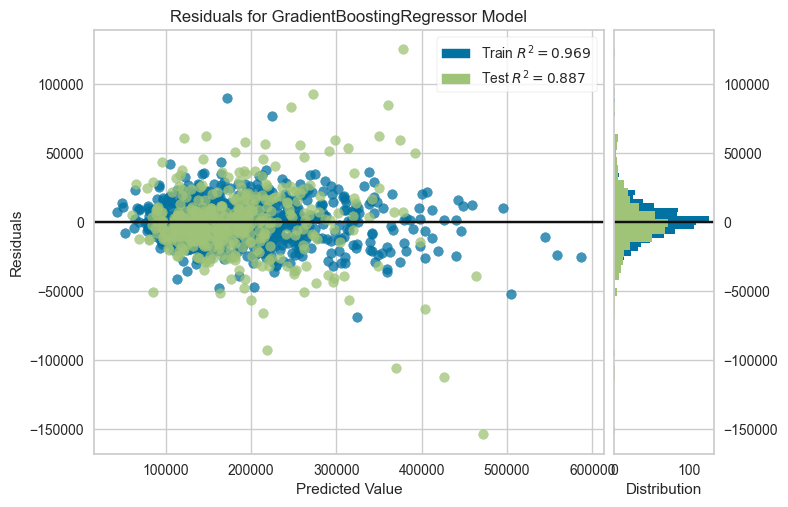

In [14]:
# Lets plot residuals
plot_model(best_model, plot='residuals')

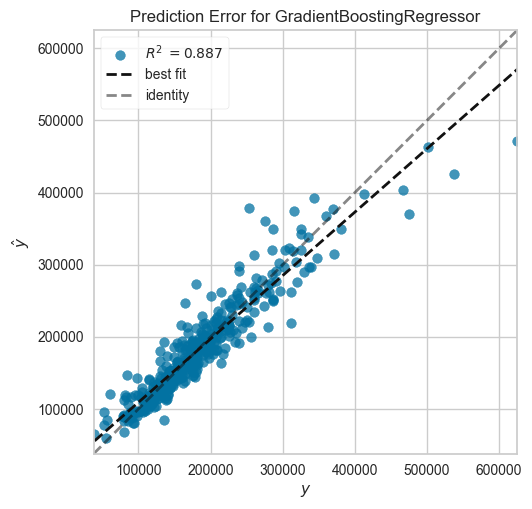

In [15]:
# Lets plot the errors
plot_model(best_model, plot='error')

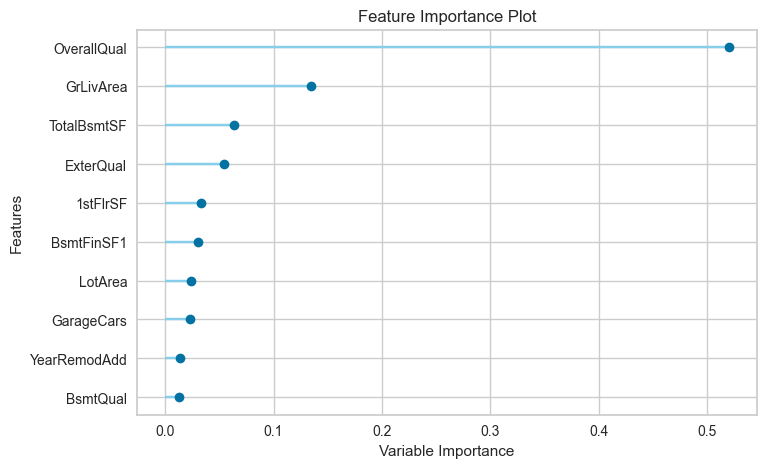

In [16]:
# Lets plot feature importance
plot_model(best_model, plot='feature')

# Create model

CatBoost Regressor used here which is the best model.

In [17]:
# Train model with default fold=10
gbr = create_model(best_model)

# Similar as above code line with specific number of folds
#lightgbm = create_model('lightgbm', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17702.6656,673700069.1604,25955.7329,0.9093,0.1410,0.1007
1,17902.5876,698361306.4180,26426.5266,0.8630,0.1387,0.0984
2,16299.0278,637394283.3004,25246.6688,0.8825,0.1366,0.1002
3,12481.9597,270652818.1793,16451.5294,0.9378,0.1161,0.0860
4,15025.7889,491346550.9787,22166.3382,0.9187,0.1421,0.1007
5,15680.7630,581039007.9052,24104.7507,0.8801,0.1300,0.0944
6,19487.5818,1096872079.8963,33119.0592,0.8724,0.1364,0.0991
7,19437.3298,895382127.1713,29922.9365,0.8893,0.1439,0.1074
8,13876.2090,441423933.7933,21010.0912,0.9208,0.1063,0.0763


In [18]:
# Create secondary model to illustrate interpret_model fuction futher below in code

lightgbm = create_model('lightgbm', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17364.9905,657180616.8211,25635.5343,0.8859,0.1449,0.1046
1,17341.1619,703806284.9777,26529.3476,0.8906,0.1482,0.1083
2,18096.3364,719524145.3642,26823.9472,0.8817,0.1334,0.0997
Mean,17600.8296,693503682.3877,26329.6097,0.8861,0.1422,0.1042
Std,350.5112,26473717.8210,505.3070,0.0037,0.0063,0.0035


`compare_models` allows specific models to be compared.

In [19]:
# Compare top 3 models
compare_regression_models = compare_models(include = ['lightgbm','gbr','br'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16406.1676,630312951.7653,24714.0329,0.8969,0.1305,0.0951,0.1720
lightgbm,Light Gradient Boosting Machine,16635.2823,647399969.9425,25057.2251,0.8940,0.1349,0.0975,0.1680
br,Bayesian Ridge,18970.5284,742369132.6863,26905.0221,0.8775,0.1703,0.1164,0.0650


In [20]:
# Show best model from the top 3 specified in previous cell
compare_regression_models

GradientBoostingRegressor(random_state=123)

By default `compare_models` return the single best performing model (as seen in above cell) based on a defined metric.

In [21]:
# Get top 3 model based on MAE
best_mae_models_top3 = compare_models(sort = 'MAE', n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16406.1676,630312951.7653,24714.0329,0.8969,0.1305,0.0951,0.1660
lightgbm,Light Gradient Boosting Machine,16635.2823,647399969.9425,25057.2251,0.8940,0.1349,0.0975,0.1530
et,Extra Trees Regressor,16876.7080,677984459.5357,25518.0845,0.8909,0.1376,0.1001,0.2250
rf,Random Forest Regressor,17714.3812,759156230.2756,27082.4457,0.8770,0.1452,0.1050,0.3150
br,Bayesian Ridge,18970.5284,742369132.6863,26905.0221,0.8775,0.1703,0.1164,0.0630
llar,Lasso Least Angle Regression,19297.5142,752113862.0011,27093.5450,0.8756,0.1787,0.1192,0.0710
ridge,Ridge Regression,19514.0052,767274440.2680,27421.1609,0.8728,0.1846,0.1210,0.0610
en,Elastic Net,19643.8915,859260535.1356,28930.3773,0.8579,0.1759,0.1191,0.0780
lasso,Lasso Regression,19850.1951,809133854.8217,28079.7957,0.8668,0.1854,0.1237,0.0770
ada,AdaBoost Regressor,22810.4855,1009202158.5529,31546.0222,0.8316,0.1877,0.1483,0.1150


In [22]:
best_mae_models_top3

[GradientBoostingRegressor(random_state=123),
 LGBMRegressor(n_jobs=-1, random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [23]:
# Train linear regression with specific model parameters

#create_model('catboost', fit_intercept = False) #fit_intercept applies to LGBMRegressor
create_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17702.6656,673700069.1604,25955.7329,0.9093,0.1410,0.1007
1,17902.5876,698361306.4180,26426.5266,0.8630,0.1387,0.0984
2,16299.0278,637394283.3004,25246.6688,0.8825,0.1366,0.1002
3,12481.9597,270652818.1793,16451.5294,0.9378,0.1161,0.0860
4,15025.7889,491346550.9787,22166.3382,0.9187,0.1421,0.1007
5,15680.7630,581039007.9052,24104.7507,0.8801,0.1300,0.0944
6,19487.5818,1096872079.8963,33119.0592,0.8724,0.1364,0.0991
7,19437.3298,895382127.1713,29922.9365,0.8893,0.1439,0.1074
8,13876.2090,441423933.7933,21010.0912,0.9208,0.1063,0.0763


GradientBoostingRegressor(random_state=123)

# Tune hyperparameters

In [24]:
#tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize='MAE')

# Default parameters
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17727.9853,724135017.0796,26909.7569,0.9025,0.1551,0.1052
1,18110.5204,657900868.7798,25649.5783,0.8710,0.1356,0.1031
2,16953.5432,684744399.6509,26167.6212,0.8738,0.1420,0.1036
3,13354.5572,334620496.6955,18292.6350,0.9231,0.1207,0.0904
4,15141.7875,472309678.3598,21732.6869,0.9219,0.1421,0.1023
5,15188.5749,533978619.1808,23107.9774,0.8898,0.1226,0.0918
6,19666.8484,1058337410.1759,32532.0982,0.8768,0.1410,0.1036
7,18889.3072,860784237.5245,29339.1247,0.8936,0.1405,0.1047
8,16957.4477,716124803.9062,26760.5083,0.8715,0.1181,0.0882


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [25]:
# Show tuned hyperparameters
tuned_gbr

GradientBoostingRegressor(random_state=123)

In [26]:
#help(tune_model)

# Ensemble model
Ensemble model function enables a given estimator.

In [27]:
gbr_dt = ensemble_model(gbr, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17386.2064,640601690.5897,25310.1104,0.9137,0.1413,0.1008
1,16902.5184,584255001.8580,24171.3674,0.8854,0.1298,0.0945
2,14906.5059,543046341.5770,23303.3547,0.8999,0.1311,0.0938
3,12400.9334,257140036.6390,16035.5866,0.9409,0.1170,0.0871
4,14767.9739,437226089.0751,20909.9519,0.9277,0.1429,0.1014
5,14529.7569,527271367.5944,22962.3903,0.8912,0.1249,0.0879
6,19236.8439,1047385381.0119,32363.3339,0.8781,0.1337,0.0979
7,18148.4319,791468803.1886,28133.0553,0.9021,0.1455,0.1043
8,13540.7620,403764304.8205,20093.8873,0.9276,0.0937,0.0713


In [28]:
gbr_boosted = ensemble_model(gbr, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17423.2139,625790771.1216,25015.8104,0.9157,0.1436,0.1025
1,17126.6346,593379788.9153,24359.3881,0.8836,0.1294,0.0964
2,14816.2069,524832966.0666,22909.2332,0.9033,0.1303,0.0932
3,12685.0618,261193742.1019,16161.4895,0.9400,0.1171,0.0878
4,15549.7554,471524828.9666,21714.6225,0.9220,0.1484,0.1082
5,15558.1588,538760919.8437,23211.2240,0.8888,0.1313,0.0964
6,19127.5993,1051922282.7253,32433.3514,0.8776,0.1341,0.0986
7,17766.2196,764995345.8996,27658.5492,0.9054,0.1400,0.1009
8,14514.5312,468754331.4717,21650.7351,0.9159,0.0975,0.0746


In [29]:
# Help will show additional parameters for ensemble_model
#help(ensemble_model)

# Blend models
`blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter.

In [30]:
# Top 3 models
best_mae_models_top3

[GradientBoostingRegressor(random_state=123),
 LGBMRegressor(n_jobs=-1, random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [31]:
# Blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17191.3973,679156619.8568,26060.6335,0.9085,0.1456,0.0998
1,17059.3256,621295664.4469,24925.8032,0.8782,0.1319,0.0957
2,14793.2071,547817990.7909,23405.5120,0.8990,0.1311,0.0918
3,12020.8208,248397374.5576,15760.6274,0.9429,0.1156,0.0842
4,14788.0858,427140779.3427,20667.3844,0.9293,0.1445,0.1027
5,14480.7809,541812456.1943,23276.8653,0.8882,0.1240,0.0879
6,19483.1823,1098929338.2542,33150.1031,0.8721,0.1369,0.0991
7,18583.5189,865308818.1828,29416.1319,0.8930,0.1476,0.1060
8,13144.5470,413246865.7312,20328.4743,0.9259,0.0936,0.0692


VotingRegressor(estimators=[('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=123)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123))],
                n_jobs=-1)

In [32]:
#help(blend_models)

# Stack models
The stack_models function trains a meta-model over select estimators passed in the estimator_list parameter.

In [33]:
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17078.9031,618526473.4112,24870.1925,0.9167,0.1489,0.1044
1,18981.4494,686606176.9085,26203.1711,0.8654,0.1510,0.1098
2,14673.6366,475236056.8005,21799.9096,0.9124,0.1298,0.0923
3,13455.3400,391926630.2881,19797.1369,0.9099,0.1787,0.0875
4,14102.0871,464421585.3387,21550.4428,0.9232,0.1471,0.0968
5,15948.5286,572191308.2533,23920.5207,0.8819,0.1434,0.1004
6,20474.9682,1393122305.2663,37324.5537,0.8379,0.2153,0.1146
7,17908.6064,785955277.0748,28034.8939,0.9028,0.1271,0.0941
8,16838.1674,740185878.0243,27206.3573,0.8672,0.2138,0.1017


StackingRegressor(cv=5,
                  estimators=[('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=123)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

In [34]:
#help(stack_models)

# Interpret model
Requires use of the analysis function

In [35]:
#help(interpret_model)

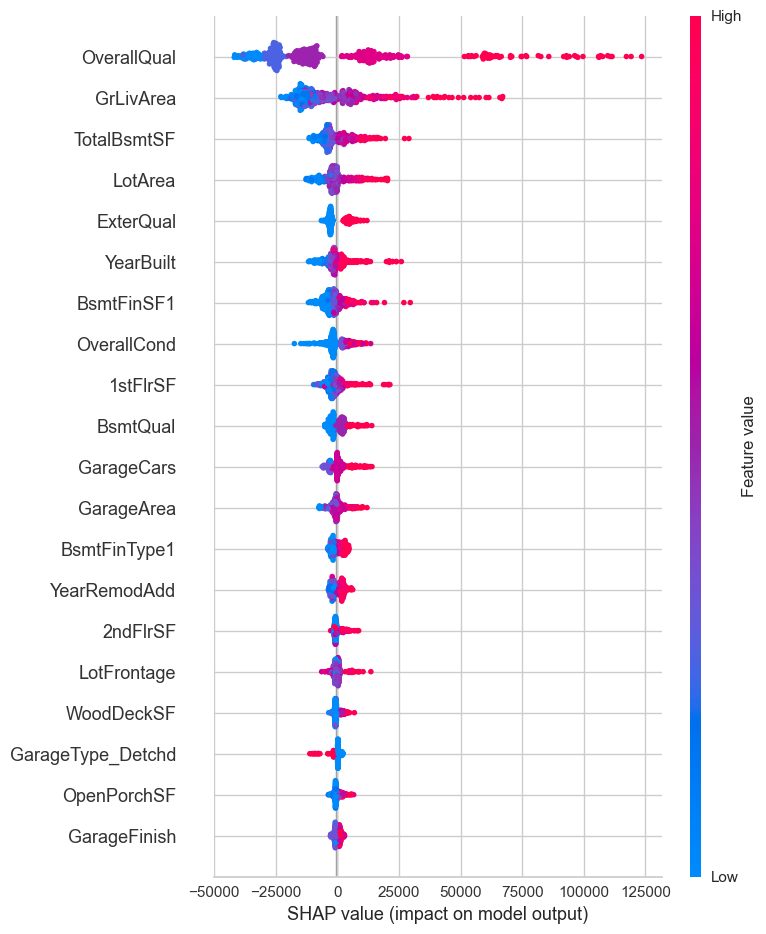

In [36]:
# This function only supports tree based models for binary classification: lightgbm, dt, et, rf

interpret_model(lightgbm)

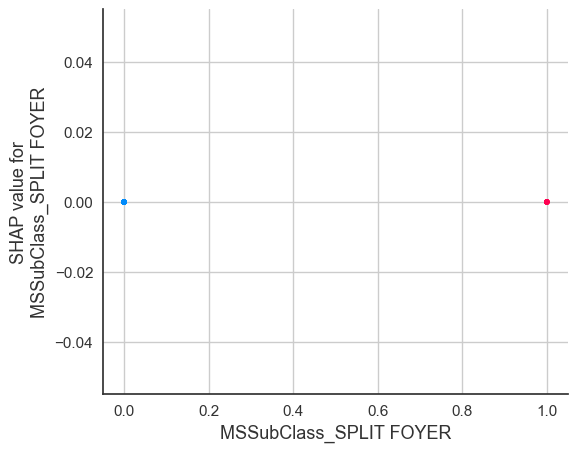

In [37]:
interpret_model(lightgbm, plot='correlation')

In [38]:
interpret_model(lightgbm, plot='reason', observation=12)

# Get Leaderboard
Returning the leaderboard of all trained models in current setup.

In [39]:
#leadbrd = get_leaderboard()
#leadbrd

# AutoML
Function returns the best model out of all trained models in the current setup based on the optimize parameter.

In [40]:
automl()

# As in our above code the best model was also chosen the best model by AutoML()

BaggingRegressor(estimator=GradientBoostingRegressor(random_state=123),
                 n_estimators=50, random_state=123)

# Dashboard
Dashboard function generates the interactive dashboard for a trained model.

In [41]:
#using lightgbm; some pycaret function don't support gbr

dashboard(lightgbm, display_format='inline')

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


# Predict model
Predict model function allows us to review the actual 'SalePrice' with the 'prediction_label'. Actual prices are very close to predicted.

In [42]:
pred_holdouts = predict_model(lightgbm)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,17123.6527,722813109.7904,26885.1838,0.8651,0.1361,0.0970


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LandContour,LotConfig,LandSlope,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,YrSold,SalePrice,prediction_label
666,1-STORY 1946+,RL,65.0,8125,NaN,Lvl,Inside,0,1Fam,1Story,...,0,0,0,0,0,NaN,Oct,2008,193500,198947.550120
633,DUPLEX,RL,64.0,6979,NaN,Lvl,Inside,0,Duplex,SFoyer,...,0,0,0,0,4,Shed,June,2010,144000,142107.998014
161,2-STORY 1946+,RL,110.0,13688,NaN,Lvl,Inside,0,1Fam,2Story,...,0,0,0,0,0,NaN,Mar,2008,412500,397056.980335
147,2-STORY 1946+,RL,NaN,9505,NaN,Lvl,CulDSac,0,1Fam,2Story,...,0,0,0,0,0,NaN,May,2010,222500,237991.929460
18,1-STORY 1946+,RL,66.0,13695,NaN,Lvl,Inside,0,1Fam,1Story,...,0,0,0,0,0,NaN,June,2008,159000,151351.517016


# Create app
Create a basic gradio app for inference

In [43]:
#help(create_app)

In [44]:
# creation of the app is working; however I think that my dataset contains too may features; Will consider removing some of the less useful ones

create_app(lightgbm)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


# Create API
Function takes an input model and creates a POST API for inference.

In [45]:
# Create API
create_api(gbr, api_name = 'housing_price_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python housing_price_api.py


In [46]:
# Run API
!python housing_price_api.py

# NameError: name 'nan' is not defined - this error was being generated; I opened housing_price_api.py and edited the data line to removed the nan valued on some features.

# Alternately you can open and run the code in housing_price_api.py file to get more info.
"""
INFO:     Started server process [22896]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:80 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [22896]
"""

Transformation Pipeline and Model Successfully Loaded


Traceback (most recent call last):
  File "c:\Users\joseg\Documents\GitHub\PyCaret-Regression-Python\housing_price_api.py", line 16, in <module>
    input_model = create_model("housing_price_api_input", **{'MSSubClass': 'SPLIT FOYER', 'MSZoning': 'RL', 'LotFrontage': 57.0, 'LotArea': 8846, 'Alley': nan, 'LandContour': 'Lvl', 'LotConfig': 'CulDSac', 'LandSlope': 0, 'BldgType': '1Fam', 'HouseStyle': 'SFoyer', 'OverallQual': 5, 'OverallCond': 5, 'YearBuilt': 1996, 'YearRemodAdd': 1996, 'RoofStyle': 'Gable', 'RoofMatl': 'CompShg', 'MasVnrType': 'None', 'MasVnrArea': 0, 'ExterQual': 4, 'ExterCond': 3, 'Foundation': 'PConc', 'BsmtQual': 4, 'BsmtCond': 3, 'BsmtExposure': 2, 'BsmtFinType1': 6, 'BsmtFinSF1': 298, 'BsmtFinType2': 1, 'BsmtFinSF2': 0, 'BsmtUnfSF': 572, 'TotalBsmtSF': 870, 'Heating': 'GasA', 'HeatingQC': 5, 'CentralAir': 1, 'Electrical': 5, '1stFlrSF': 914, '2ndFlrSF': 0, 'GrLivArea': 914, 'GarageType': 'Detchd', 'GarageYrBlt': 1998, 'GarageFinish': 1, 'GarageCars': 2, 'GarageArea'

'\nINFO:     Started server process [22896]\nINFO:     Waiting for application startup.\nINFO:     Application startup complete.\nINFO:     Uvicorn running on http://127.0.0.1:80 (Press CTRL+C to quit)\nINFO:     Shutting down\nINFO:     Waiting for application shutdown.\nINFO:     Application shutdown complete.\nINFO:     Finished server process [22896]\n'

# Finalize model
trains the provided model on the entire dataset including the hold-out set

In [47]:
final_best = finalize_model(best_model)

In [48]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['LotFrontage', 'LotArea',
                                             'LandSlope', 'OverallQual',
                                             'OverallCond', 'YearBuilt',
                                             'YearRemodAdd', 'MasVnrArea',
                                             'ExterQual', 'ExterCond',
                                             'BsmtQual', 'BsmtCond',
                                             'BsmtExposure', 'BsmtFinType1',
                                             'BsmtFinSF1', 'BsmtFinType2',
                                             'BsmtFinSF2', 'BsmtUnfSF',
                                             'TotalBsmtSF', 'HeatingQ...
                                             'Heating', 'GarageType',
                                             'MiscFeature', 'MoSold'],
                                    transformer=OneHotEncoder(cols=['MSSubClass',
                                                                    'MSZoning',
                                                                    'LandContour',
                                                                    'LotConfig',
                                                                    'BldgType',
                                                                    'HouseStyle',
                                                                    'RoofStyle',
                                                                    'RoofMatl',
                                                                    'MasVnrType',
                                                                    'Foundation',
                                                                    'Heating',
                                                                    'GarageType',
                                                                    'MiscFeature',
                                                                    'MoSold'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=123))])

# Save/Load model
Save the transformaiton pipeline and the trained model object as a pickle file

In [50]:
# save model
save_model(best_model, 'houseprice_best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['LotFrontage', 'LotArea',
                                              'LandSlope', 'OverallQual',
                                              'OverallCond', 'YearBuilt',
                                              'YearRemodAdd', 'MasVnrArea',
                                              'ExterQual', 'ExterCond',
                                              'BsmtQual', 'BsmtCond',
                                              'BsmtExposure', 'BsmtFinType1',
                                              'BsmtFinSF1', 'BsmtFinType2',
                                              'BsmtFinSF2', 'BsmtUnfSF',
                                              'TotalBsmtSF', 'HeatingQ...
                                              'Heating', 'GarageType',
                                              'MiscFeature', 'MoSold'],
                                     tr

In [52]:
# example on how to load model
load_from_disk = load_model('houseprice_best_model')
load_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\joseg\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['LotFrontage', 'LotArea',
                                             'LandSlope', 'OverallQual',
                                             'OverallCond', 'YearBuilt',
                                             'YearRemodAdd', 'MasVnrArea',
                                             'ExterQual', 'ExterCond',
                                             'BsmtQual', 'BsmtCond',
                                             'BsmtExposure', 'BsmtFinType1',
                                             'BsmtFinSF1', 'BsmtFinType2',
                                             'BsmtFin...
                                             'Heating', 'GarageType',
                                             'MiscFeature', 'MoSold'],
                                    transformer=OneHotEncoder(cols=['MSSubClass',
                                                                    'MSZoning',
                                                                    'LandContour',
                                                                    'LotConfig',
                                                                    'BldgType',
                                                                    'HouseStyle',
                                                                    'RoofStyle',
                                                                    'RoofMatl',
                                                                    'MasVnrType',
                                                                    'Foundation',
                                                                    'Heating',
                                                                    'GarageType',
                                                                    'MiscFeature',
                                                                    'MoSold'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', GradientBoostingRegressor(random_state=123))])

# Save/Load experiment
Save all of the experiment's variables on disk, allowing to resume without re-running the setup function

In [53]:
# save experiment
save_experiment('houseprice_experiment')

In [54]:
# load experiment
saved_experiment = load_experiment('houseprice_experiment', data=housedata)

,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1456, 56)"
4,Transformed data shape,"(1456, 134)"
5,Transformed train set shape,"(1019, 134)"
6,Transformed test set shape,"(437, 134)"
7,Ordinal features,1
8,Numeric features,40
9,Categorical features,15
